In [15]:
import numpy as np
from qutip import Options
import qutip as qt
from quantum_logical.pulsesim import QuantumSystem, Pulse
from quantum_logical.pulsesim.hamiltonian import QubitQubitCavity
from quantum_logical.pulsesim.mode import QubitMode, CavityMode
import matplotlib.pyplot as plt
from itertools import product
from tqdm.notebook import tqdm
import scqubits as scq

opts = Options(nsteps=1e6, atol=1e-8, rtol=1e-6)
p_bar = qt.ui.TextProgressBar()  # None

In [16]:
# Optionally, can build from a YAML file instead :)
# quantum_system = QuantumSystem.from_yaml(yaml_file)
w1 = 7.0
w2 = 1.0
wc = .8
g1c = .2
g2c = .08
dimc = 2

# TODO
# FIXME, these kwargs attributes are ugly/bad :(
qubit1=scq.GenericQubit(w1)
qubit2=scq.GenericQubit(w2)
cavity=scq.Oscillator(wc, truncated_dim=dimc)

#creating the hilbert space for the three bodies
hilbertspace=scq.HilbertSpace([qubit1,qubit2,cavity])

In [17]:
hilbertspace.hamiltonian()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[-4.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -3.2  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -3.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -2.2  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   3.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   3.8  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   4.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   4.8]]

In [18]:
#adding the interaction terms of the hamiltonian 
hilbertspace.add_interaction(
    g_strength = g1c,
    op1 = qubit1.sm_operator,
    op2 = cavity.creation_operator,
    add_hc=True
)

hilbertspace.add_interaction(
    g_strength = g2c,
    op1 = qubit2.sm_operator,
    op2 = cavity.creation_operator,
    add_hc = True
)

In [19]:
hilbertspace.interaction_hamiltonian()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.08 0.   0.2  0.   0.   0.  ]
 [0.   0.08 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.2  0.  ]
 [0.   0.2  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.08 0.  ]
 [0.   0.   0.   0.2  0.   0.08 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]

In [20]:
hilbertspace.hamiltonian()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[-4.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -3.2   0.08  0.    0.2   0.    0.    0.  ]
 [ 0.    0.08 -3.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -2.2   0.    0.    0.2   0.  ]
 [ 0.    0.2   0.    0.    3.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    3.8   0.08  0.  ]
 [ 0.    0.    0.    0.2   0.    0.08  4.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    4.8 ]]

In [21]:
hilbertspace.diag_hamiltonian
hilbertspace.hamiltonian()

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[-4.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -3.2   0.08  0.    0.2   0.    0.    0.  ]
 [ 0.    0.08 -3.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -2.2   0.    0.    0.2   0.  ]
 [ 0.    0.2   0.    0.    3.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    3.8   0.08  0.  ]
 [ 0.    0.    0.    0.2   0.    0.08  4.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    4.8 ]]

In [22]:
hilbertspace.diag_hamiltonian(qubit1)+hilbertspace.diag_hamiltonian(qubit2)+hilbertspace.diag_hamiltonian(cavity)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[-4.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -3.2  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -3.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -2.2  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   3.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   3.8  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   4.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   4.8]]

In [23]:
#may be useful for communcation between the dresses and the bare modes 

hilbertspace.generate_lookup()
q1_idx = hilbertspace.get_subsys_index(qubit1)
hilbertspace["bare_evals"][q1_idx]
# hilbertspace.dressed_index((0,0,0))
# hilbertspace.energy_by_bare_index((1,0,0))


NamedSlotsNdarray([[-3.5,  3.5]])

In [24]:
# prepare an initial state
psi0 = qt.tensor(qt.basis(2,1),qt.basis(2,0),qt.basis(dimc,0))

# prepare qubit bell state tensored with cavity in vacuum state
# psi0 = qt.tensor(qt.bell_state("01"), qt.basis(cavity.dim, 0))

#preparing the intial density matrix 
#Ui = psi0 * psi0.dag

# prepare an inital state |01> for qubits and a slight excitation in the cavity
# |cavity> = .99 |0> + .1 |1>
# psi0 = qt.tensor(
#     qt.basis(qubit1.dim, 0),
#     qt.basis(qubit2.dim, 1),
#     0.99 * qt.basis(cavity.dim, 0) + 0.1 * qt.basis(cavity.dim, 1),
# )

In [25]:
# define desired unitary and expected final state
U = qt.tensor(qt.qip.operations.iswap(N=2), qt.identity(dimc))
expected_psi = U * psi0

In [26]:
#impliment after this runs without the loss first 
# collapse operators
# c_ops = []
# for mode in quantum_system.modes:
#     c_ops.append(mode.collapse_operators(quantum_system))

# NOTE uncomment to turn off loss
c_ops = None

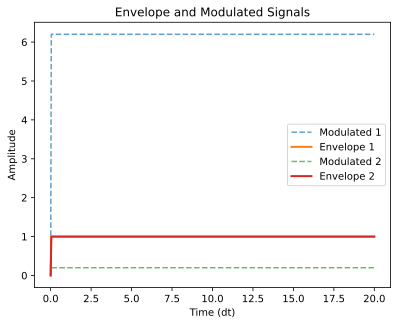

In [27]:
total_pulse_duration = 20
t_list = np.linspace(0, total_pulse_duration, 500)

# in this experiment, we have fixed width and sweep the two amplitudes
width_d = total_pulse_duration

args1 = {"shape": Pulse.box, "shape_params": {"t0": 0, "width": width_d}}
pulse1 = Pulse(omega=0.0, amp=np.abs(qubit1.E - cavity.E_osc))
lambda_pulse1 = lambda t, args: pulse1.drive(t, args1)  # noqa: E731

args2 = {"shape": Pulse.box, "shape_params": {"t0": 0, "width": width_d}}
pulse2 = Pulse(omega=0.0, amp=np.abs(qubit2.E - cavity.E_osc))
lambda_pulse2 = lambda t, args: pulse2.drive(t, args2)  # noqa: E731

# plot an example pulse from the experiment to verify its shape

Pulse.plot_pulse([(pulse1, args1), (pulse2, args2)], t_list)

In [28]:
# Define experiment constants
N = 30  # Number of points in the parameter sweep

# Sweep pulse amplitudes for both qubits
max_amplitude = 10
amp1_range = np.linspace(0, max_amplitude, N)
amp2_range = np.linspace(0, max_amplitude, N)

#this is done in order to subtract the old unnecessary parts of the hamiltonian 
hilbertspace.add_interaction(
    g_strength = -g1c,
    op1 = qubit1.sm_operator,
    op2 = cavity.creation_operator,
    add_hc=True 
    )

hilbertspace.add_interaction(
    g_strength = -g2c,
    op1 = qubit2.sm_operator,
    op2 = cavity.creation_operator,
    add_hc = True
    )


#creating the simulating function 
def simulation_task(amp1_amp2_tuple):
    amp1, amp2 = amp1_amp2_tuple
    # XXX For now, assuming same pulse for both qubits
    pulse1.amp = amp1
    lambda_pulse1 = lambda t, args: pulse1.drive(t, args1)  # noqa: E731

    pulse2.amp = amp2
    lambda_pulse2 = lambda t, args: pulse2.drive(t, args2)  # noqa: E731

    #H = hamiltonian.driven(lambda_pulse1, lambda_pulse2)

    #if pulse other than box need to be used just use the drive function already given above
    
    # def transformed_pulse1(t, args):
    #         # eta = pulse1.drive(t, args)
    #         eta = pulse1(t, args)
    #         return 1 + 2 * eta + eta**2

    # def transformed_pulse2(t, args):
    #         # eta = pulse2.drive(t, args)
    #         eta = pulse2(t, args)
    #         return 1 + 2 * eta + eta**2
    
    #insert the interaction 
    #need to be able to make a function into a variable in order to multiply 

    #the issue here is - where exactly is the amplitude being scanned over

    # def transformed_pulse3(t, args):
    #         # eta1 = pulse1.drive(t, args)
    #         eta1 = pulse1(t, args)
    #         # eta2 = pulse2.drive(t, args)
    #         eta2 = pulse2(t, args)
    #         return 1 + eta1 + eta2 + eta1 * eta2


    #this should give the final state properly but For some reason I can not execute this cell 
    H = hilbertspace.hamiltonian()
    solve_result = qt.mesolve(H, psi0, t_list, options=opts, c_ops=c_ops)
    final_state = solve_result.states[-1]

    ground_state_populations = [
         quantum_system.mode_population_expectation(final_state, mode, 0)
         for mode in quantum_system.modes
    ]

    # Calculate fidelity with the expected final state
    fidelity = qt.fidelity(expected_psi, final_state)

    return ground_state_populations, fidelity


# Prepare the parameters for parallel execution
amp1_amp2_tuple = [(amp1, amp2) for amp1 in amp1_range for amp2 in amp2_range]

# Run the simulations in parallel
results = qt.parallel.parallel_map(simulation_task, amp1_amp2_tuple, progress_bar=True)

# Process results
ground_state_populations = np.zeros(
    (len(hilbertspace), len(amp1_range), len(amp2_range))
)
fidelity_matrix = np.zeros((len(amp1_range), len(amp2_range)))

for idx, (amp1, amp2) in enumerate(amp1_amp2_tuple):
    amp2_idx = np.where(amp2_range == amp2)[0][0]
    amp1_idx = np.where(amp1_range == amp1)[0][0]
    populations, fidelity = results[idx]

    # Store ground state populations
    for k, pop in enumerate(populations):
        ground_state_populations[k, amp1_idx, amp2_idx] = pop

    # Store fidelity
    fidelity_matrix[amp1_idx, amp2_idx] = fidelity

Total run time:   1.50s


ValueError: Invalid Interaction Term. Exception: Incompatible object for multiplication

In [ ]:
# Prepare the plot
fig, axes = plt.subplots(
    1, len(hilbertspace), figsize=(len(hilbertspace) * 4, 4)
)

# Define the number of ticks for the detuning x-axis
n_xticks = 5  # Adjust the number of ticks as needed

# Plot data for each mode
for k, mode in enumerate(hilbertspace):
    im = axes[k].imshow(
        ground_state_populations[k],
        extent=[amp2_range[0], amp2_range[-1], amp1_range[0], amp1_range[-1]],
        aspect="auto",
        origin="lower",
        vmin=0.0,
        vmax=1.0,  # Set color bar scale from 0.0 to 1.0
    )
    axes[k].set_title(f"Mode: {mode.name}")
    axes[k].set_xlabel("Amplitude 2 (a.u.)")
    axes[k].set_ylabel("Amplitude 1 (a.u.)")

    # Customize x-axis ticks
    # xticks = np.linspace(flist[0] * rad_to_GHz, flist[-1] * rad_to_GHz, n_xticks)
    xticks = np.linspace(amp2_range[0], amp2_range[-1], n_xticks)
    axes[k].set_xticks(xticks)
    axes[k].set_xticklabels([f"{x:.2f}" for x in xticks])  # Format the tick labels

    # Add color bar
    cbar = fig.colorbar(
        im, ax=axes[k], orientation="vertical", label="Ground State Population"
    )
    cbar.set_ticks(np.linspace(0, 1, 5))  # Customize color bar ticks

plt.tight_layout()
plt.show()

NameError: name 'hils' is not defined

In [ ]:
# Prepare the plot for fidelity
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the fidelity matrix
im = ax.imshow(
    fidelity_matrix,
    extent=[amp2_range[0], amp2_range[-1], amp1_range[0], amp1_range[-1]],
    aspect="auto",
    origin="lower",
    vmin=0.0,
    vmax=1.0,  # Fidelity ranges from 0 to 1
)

ax.set_title("iSWAP Gate Fidelity")
axes[k].set_xlabel("Amplitude 2 (a.u.)")
axes[k].set_ylabel("Amplitude 1 (a.u.)")
ax.set_xticks(np.linspace(amp2_range[0], amp2_range[-1], n_xticks))
ax.set_xticklabels(
    [f"{x:.2f}" for x in np.linspace(amp2_range[0], amp2_range[-1], n_xticks)]
)

# Add color bar for fidelity
cbar = fig.colorbar(im, ax=ax, orientation="vertical", label="Fidelity")
cbar.set_ticks(np.linspace(0, 1, 5))

plt.tight_layout()
plt.show()

In [ ]:
# Find the pulse parameters that maximize fidelity
max_fidelity = np.max(fidelity_matrix)
max_fidelity_indices = np.where(fidelity_matrix == max_fidelity)

# Since the indices are returned in a tuple of arrays, we take the first element
max_fidelity_amp_idx, max_fidelity_width_idx = (
    max_fidelity_indices[0][0],
    max_fidelity_indices[1][0],
)

# Retrieve the amplitude and width that correspond to the maximum fidelity
max_fidelity_amp2 = amp2_range[max_fidelity_width_idx]
max_fidelity_amp1 = amp1_range[max_fidelity_amp_idx]

print(f"Max fidelity: {max_fidelity:.4f}")
print(f"Pulse 2 amplitude for max fidelity: {max_fidelity_amp2:.2f} a.u.")
print(f"Pulse 1 amplitude for max fidelity: {max_fidelity_amp1:.2f} a.u.")